In [49]:
# LeNet-5 논문 공부
# 라온피플, 블로그 등 다양한 곳에서 찾으면서 공부
# https://oi.readthedocs.io/en/latest/computer_vision/cnn/lenet.html

In [ ]:
#LeNet-5는 손으로 적은 우편번호를 전통적인 방법보다 효율적으로 확인하기 위해 고안된 CNN 구조

In [2]:
#역전파 알고리즘으로 훈련된 다층신경망의 경우, Gradient 기반 학습 기술에 있어서
#고차원의 패턴을 가진 데이터를 분류함에 있어 적은 전처리만으로 좋은 성능을 보여준다.

In [3]:
#GTN(Graph Transformer Networks)의 경우, 여러 모듈들에 대해 Gradient 기반 학습을 하도록 하여
#비즈니스/ 개인수표를 읽는데 있어 정확도를 높여서 상업적으로 적용이 됐다.

In [4]:
#전통적인 패턴인식 모델은 수작업된(Hand-crafted) 특징 추출기를 통해 입력 데이터에서 정보를 수집하였다.
#입력 데이터의 이미지가 사이즈가 커서 weight parameter의 개수가 커지고, 이는 메모리 사용량이 커지기때문.
#이미지 사이즈를 줄이거나 문자가 센터에 오도록 전처리를 하여 학습하는 방법도있지만
#회전,이동,변형등의 모든경우를 고려하기 어렵다.
#그래서 기존 네트워크모델은 더 많은 학습데이터를 필요로 했었다.

In [5]:
#기존 fully-connected network의 경우 입력데이터의 topology를 무시하고 학습함을 의미함
#입력데이터의 연관 관계를 무시한다는 의미

In [6]:
#CNN을 구성하는 아키텍처의 아이디어
#Local receptive fields
#Shared weights
#Sub-sampling

In [1]:
#Receptive-fields(수용영역)
#visual cortex(시각피질)의 매커니즘에서 아이디어를 착안
#고양이에게 그림을 보여줬을때, 특정 그림에서만 뉴런이 반응하는것을 모티브로 삼아
#입력된 이미지의 특정(local)의 특징을 추출하도록 함
#이때 kernel또는 filter를 적용한다고 하며, 특정 사이즈로 적용함
#이러한 과정을 Convolution 한다고 한다.
#filter는 하나의 weight가 된다.
#Convolution이 끝나면 feature map을 얻게 됨.
#이러한 filter를 통해 network의 다음 layer를 입력 데이터로부터 fully-connected가 아닌
#local하게 구성함으로써 사용되는 weight 파라메터의 수도 줄어들게 된다.

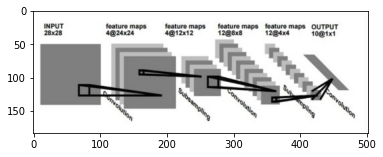

In [53]:
from PIL import Image
import matplotlib.pyplot as plt
image = Image.open('lenet.jpg')
plt.imshow(image)

In [14]:
# Lenet-5를 보기전에 Lenet-1에 대한 간단한 이해를 해보자
# LeNet-1은 입력이미지에서 Filter를 활용한 Convolution으로 Feature map을 만든다
# N개의 Filter를 사용하여 N개의 Feature map을 만들고,
# 모든 이미지에 동일한 Filter를 사용하여 Shared Weights(가중치가 동일)하게 적용

In [15]:
# 그후 Subsampling(출력값에서 일부분만 취함), pooling과 비슷

In [16]:
# 이러한 작업을 통해 특정구간(local)에 대한 정보를 획득하면서
# local feature에 대한 filter연산을 반복적으로 적용하고
# global한 feature값에 가까워지게 된다.
# 이는 이미지 전체를 대표하는 강한 특징만 남게되는것!

In [17]:
# global feature를 10개의 class로 convolution하여 classification을 가능하게함
# LeNet-1은 convolution layer와 subsampling layer로 구성되어있다고 할 수 있음.

In [18]:
# 다시 LeNet-5로 돌아와서
# LeNet-5는 28x28이미지를 32x32의 중앙에 위치시킴
# 더 큰 이미지를 사용했기때문에 Detail한 부분까지 고려하여 성능이 높아짐

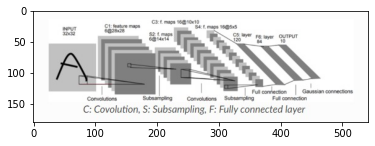

In [52]:
image2 = Image.open('lenet2.jpg')
plt.imshow(image2)

In [22]:
# LeNet-5는 Convolution layer3개, subsampling layer3개, fully connected layer1개로 구성

In [23]:
# Fully connected layer와 Convolution layer의 차이점은 무엇인가?
# 1. Fully connected layer는 input image를 1차원으로 flatten 시킨다.
# 2. 그러다보니 공간 정보가 손실되고, 정보부족으로 특징 추출 및 학습이 비효율적이 된다.
# 3. convolution layer는 input image의 형상을 유지해서 공간정보를 계속 가지고가며
# 4. 복수의 필터로 이미지의 local feature들을 만들고, pooling 하면서
# 5. 이를 global feature로 만든다.
# 6. 또한 filter가 전 과정에 있어 동일하기때문에 parameter수가 적다

In [24]:
# LeNet-5로 다시 돌아와서,
# LeNet-5는 입력으로 32x32 image를 받고 5x5 filter 6개로
# 28x28 local feature map 6개를 생성한다
# 그 후, 2x2 subsampling(average pooling, 평균값을 받아오는것)으로 14x14 feature map 6개를 생성

In [47]:
# C3,S4에서 5x5 filter로 Convolution을 해서 10x10 feature map 16개를 만들고
# 다시 2x2 subsampling(average pooling)을 해서 5x5 feature map 16개를 만든다
# filter의 값은 학습을 통해 결정된다.

In [48]:
# C5,F6을 통해 5x5 feature map 16개를 5x5 filter로 다시 convolution 하여
# 1x1 feature map 120개를 만들고
# 120개의 feature map을 크기가 84인 Fully connected layer에 연결한다
# 그리고 크기가 10인 layer와 연결하여 10개의 class를 구분할수 있게만든다

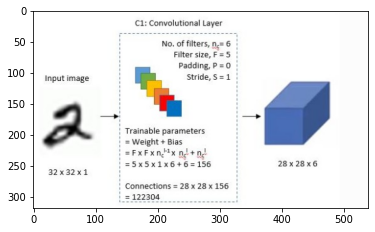

In [62]:
image = Image.open('c1_filter.jpg')
plt.imshow(image)

In [54]:
# 사용한 Filter의 갯수는 몇개일까?
# c1에서 5x5 filter 6개 + bias
# Filter 개수 : 6
# Filter 사이즈 : 5x5
# Padding : 0
# Stride : 1
# 5 * 5 * 1 * 6 + 6
# Filter * Filter * Filter개수+bias = 156
# 아직 bias계산식을 모르겠다. 더 찾아봐야함

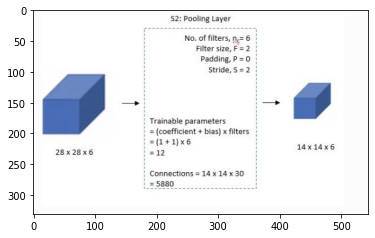

In [65]:
image = Image.open('s2_filter.jpg')
plt.imshow(image)

In [59]:
#S2에서는 Average Pooling을해서 Filter 개수 6, size 2, stride 2
# 계산을 (coefficient+bias)*필터수 로 함
#왜?
# (1+1)*6 = 12

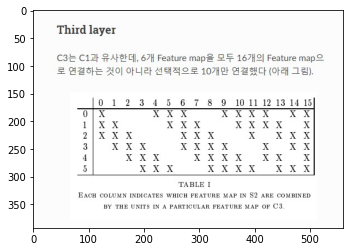

In [64]:
image = Image.open('c3_filter.jpg')
plt.imshow(image)

In [71]:
#c3는 6개의 Feature map을 16개의 Feature map으로 연결하지않고 10개만 선택
##그 이유는 연결의 대칭성을 깨서 처음 Convolution으로 얻은 6개의 local feature가 서로 다른 조합으로 섞여서 global feature로 나타나기를 기대하기 때문이라고 한다.
#filter size 5, 이전 feature map 6개, 전달된 feature map 10개 + bias
#(5x5x6)x10+16 = 1516개

## 처음 6개의 Feature map까지는 3개씩 연속되는 feautre map을 조합
## 그 다음 6개는 4개씩 연속되는 feature map을 조합
## 그다음은 3개는 2개씩 연속되게
## 마지막은 6개를 전부 다 반영한 feature

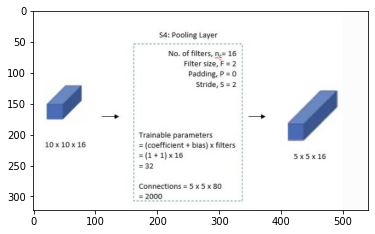

In [66]:
image = Image.open('s4_filter.jpg')
plt.imshow(image)

In [61]:
#S4는 S2와 마찬가지로 Avaerage pooling, (1+1)x16 =32
#(coefficient+bias)x필터수

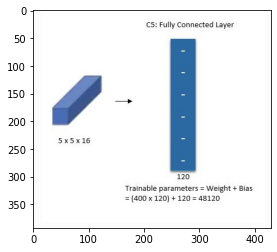

In [67]:
image = Image.open('c5_filter.jpg')
plt.imshow(image)

In [68]:
#C5는 Feature map 16개를 5x5 filter로 convolution
# 1x1 feature map 120개 생성
# weight+bias(5x5x이전 feature map수 16개) x 전달된 feature map수 +bias
# (5x5x16)x120+120 = 48120

In [69]:
#F6은 c5를 84개의 Fully connected layer에 연결
# (120x84)+84 = 10164개

In [72]:
##잘 모르겠는 부분
##1. bias는 어디서 어떻게 계산?
##2. filter의 기준??
##3. coefficient는?

In [73]:
#############LeNet-5 만들어보기###########

In [1]:
import tensorflow as tf
import pandas as pd

In [75]:
# 데이터를 준비합니다.
(x,y), _ = tf.keras.datasets.mnist.load_data()

11493376/11490434 [==============================] - 2s 0us/step


In [79]:
# 독립변수 x를 Reshape하기
x = x.reshape(60000,28,28,1)
# 종속변수 y를 one-hot encoding
y = pd.get_dummies(y)
print(x.shape, y.shape)

(60000, 28, 28, 1) (60000, 10)


In [2]:
# 모델 완성하기
X = tf.keras.layers.Input(shape=[28,28,1])
# 6장의 Filter를 사용하고 6개의 Feature map을 만들고, 32x32에서 28x28이 됐으므로 커널사이즈는 5
C = tf.keras.layers.Conv2D(6, kernel_size = 5, padding = 'same',activation='swish')(X)
# Subsampling(MaxPooling으로 진행)
C = tf.keras.layers.MaxPool2D()(C)
# Feature map이 16장이 됐으므로 filter는 16개, 28x28에서 24x24가 됐으므로 커널사이즈는 5 
C = tf.keras.layers.Conv2D(16,kernel_size = 5, activation = 'swish')(C)
# Subsampling(MaxPooling으로 진행)
C = tf.keras.layers.MaxPool2D()(C)
# C5 : 120 layer로 펼쳐주기전에 Flatten을 사용하여 펼쳐주기
C = tf.keras.layers.Flatten()(C)
# C5로 120개의 Feature 잡기
C = tf.keras.layers.Dense(120, activation='swish')(C)
# F6 으로 Fully connected layer, 84개 Feature 잡기
C = tf.keras.layers.Dense(84, activation='swish')(C)
# Output값으로 10개의 Feature(Y) 잡기
Y = tf.keras.layers.Dense(10, activation='softmax')(C)

model = tf.keras.models.Model(X,Y)
model.compile(loss='categorical_crossentropy', metrics='accuracy')

In [3]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 28, 28, 6)         156       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 10, 10, 16)        2416      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 16)          0         
_________________________________________________________________
flatten (Flatten)            (None, 400)               0         
_________________________________________________________________
dense (Dense)                (None, 120)               48120 

In [86]:
model.fit(x,y, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.1163 - accuracy: 0.9678
Epoch 2/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0777 - accuracy: 0.9793
Epoch 3/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0689 - accuracy: 0.9825
Epoch 4/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0588 - accuracy: 0.9852
Epoch 5/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0597 - accuracy: 0.9857
Epoch 6/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0587 - accuracy: 0.9875
Epoch 7/10
1875/1875 [==============================] - 12s 7ms/step - loss: 0.0596 - accuracy: 0.9874
Epoch 8/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0582 - accuracy: 0.9879
Epoch 9/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0594 - accuracy: 0.9881
Epoch 10/10
1875/1875 [==============================] - 12s 6ms/step - l

In [90]:
#모델 이용해보기
pred = model.predict(x[0:5])
pd.DataFrame(pred).round(2)


,0,1,2,3,4,5,6,7,8,9
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [91]:
#정답 확인
y[0:5]

,0,1,2,3,4,5,6,7,8,9
0,0,0,0,0,0,1,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,1


In [92]:
model.summary()

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 28, 28, 6)         156       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 10, 10, 16)        2416      
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 5, 5, 16)          0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 400)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 120)               4812

In [93]:
#Mnist말고 Cifar-10으로 해보기!!!!!!!!!!!!!!!!

(x,y), _ = tf.keras.datasets.cifar10.load_data()
print(x.shape, y.shape)

170500096/170498071 [==============================] - 498s 3us/step
(50000, 32, 32, 3) (50000, 1)


In [94]:
# y를 one-hot encoding 해주기
# mnist는 표형태가 아니라 1차원이라서 one-hot이 됐었지만 reshape를 먼저해야함
y = pd.get_dummies(y.reshape(50000))

In [97]:
# 모델 완성하기, input shape를 32,32,3로 바꿔주기
X = tf.keras.layers.Input(shape=[32,32,3])
# 6장의 Filter를 사용하고 6개의 Feature map을 만들고, 32x32에서 28x28이 됐으므로 커널사이즈는 5
C = tf.keras.layers.Conv2D(6, kernel_size = 5,activation='swish')(X)
# Subsampling(MaxPooling으로 진행)
C = tf.keras.layers.MaxPool2D()(C)
# Feature map이 16장이 됐으므로 filter는 16개, 28x28에서 24x24가 됐으므로 커널사이즈는 5 
C = tf.keras.layers.Conv2D(16,kernel_size = 5, activation = 'swish')(C)
# Subsampling(MaxPooling으로 진행)
C = tf.keras.layers.MaxPool2D()(C)
# C5 : 120 layer로 펼쳐주기전에 Flatten을 사용하여 펼쳐주기
C = tf.keras.layers.Flatten()(C)
# C5로 120개의 Feature 잡기
C = tf.keras.layers.Dense(120, activation='swish')(C)
# F6 으로 Fully connected layer, 84개 Feature 잡기
C = tf.keras.layers.Dense(84, activation='swish')(C)
# Output값으로 10개의 Feature(Y) 잡기
Y = tf.keras.layers.Dense(10, activation='softmax')(C)

model = tf.keras.models.Model(X,Y)
model.compile(loss='categorical_crossentropy', metrics='accuracy')

In [98]:
model.fit(x,y,epochs=10)

Epoch 1/10
1563/1563 [==============================] - 13s 8ms/step - loss: 2.5520 - accuracy: 0.2577
Epoch 2/10
1563/1563 [==============================] - 13s 8ms/step - loss: 1.5743 - accuracy: 0.4317
Epoch 3/10
1563/1563 [==============================] - 13s 8ms/step - loss: 1.4650 - accuracy: 0.4830
Epoch 4/10
1563/1563 [==============================] - 13s 8ms/step - loss: 1.4075 - accuracy: 0.5075
Epoch 5/10
1563/1563 [==============================] - 13s 8ms/step - loss: 1.3536 - accuracy: 0.5270
Epoch 6/10
1563/1563 [==============================] - 13s 8ms/step - loss: 1.3274 - accuracy: 0.5334
Epoch 7/10
1563/1563 [==============================] - 12s 8ms/step - loss: 1.3064 - accuracy: 0.5443
Epoch 8/10
1563/1563 [==============================] - 12s 8ms/step - loss: 1.2952 - accuracy: 0.5508
Epoch 9/10
1563/1563 [==============================] - 13s 8ms/step - loss: 1.2756 - accuracy: 0.5580
Epoch 10/10
1563/1563 [==============================] - 13s 8ms/step - l

In [104]:
#모델 이용해보기
pred = model.predict(x[0:10])
pd.DataFrame(pred).round(2)

,0,1,2,3,4,5,6,7,8,9
0,0.00,0.00,0.04,0.07,0.13,0.07,0.66,0.02,0.00,0.00
1,0.01,0.03,0.00,0.00,0.00,0.01,0.00,0.04,0.00,0.90
2,0.10,0.01,0.13,0.15,0.07,0.16,0.02,0.32,0.02,0.02
3,0.00,0.00,0.01,0.01,0.81,0.07,0.07,0.01,0.00,0.00
4,0.12,0.18,0.00,0.00,0.00,0.00,0.00,0.00,0.33,0.37
5,0.04,0.38,0.01,0.04,0.01,0.04,0.01,0.03,0.03,0.42
6,0.01,0.00,0.66,0.02,0.21,0.03,0.04,0.01,0.00,0.00
7,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00
8,0.44,0.02,0.00,0.00,0.00,0.00,0.00,0.00,0.48,0.06
9,0.08,0.00,0.10,0.17,0.25,0.12,0.04,0.15,0.06,0.02


In [105]:
#정답 확인
y[0:10]

,0,1,2,3,4,5,6,7,8,9
0,0,0,0,0,0,0,1,0,0,0
1,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,1,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0
5,0,1,0,0,0,0,0,0,0,0
6,0,0,1,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,1,0,0
8,0,0,0,0,0,0,0,0,1,0
9,0,0,0,1,0,0,0,0,0,0


In [101]:
model.summary()

Model: "model_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 28, 28, 6)         456       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 10, 10, 16)        2416      
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 5, 5, 16)          0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 400)               0         
_________________________________________________________________
dense_18 (Dense)             (None, 120)               4812

In [109]:
test_loss, test_acc = model.evaluate(x,y,verbose=2)
print('\n테스트 정확도 :', test_acc)

1563/1563 - 5s - loss: 1.3538 - accuracy: 0.5428

테스트 정확도 : 0.5428000092506409
